In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, scale

In [2]:
audio_path = "../data/raw/sound/T08-violin.wav"
x, sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(396688,) 22050


In [3]:
ipd.Audio(audio_path)

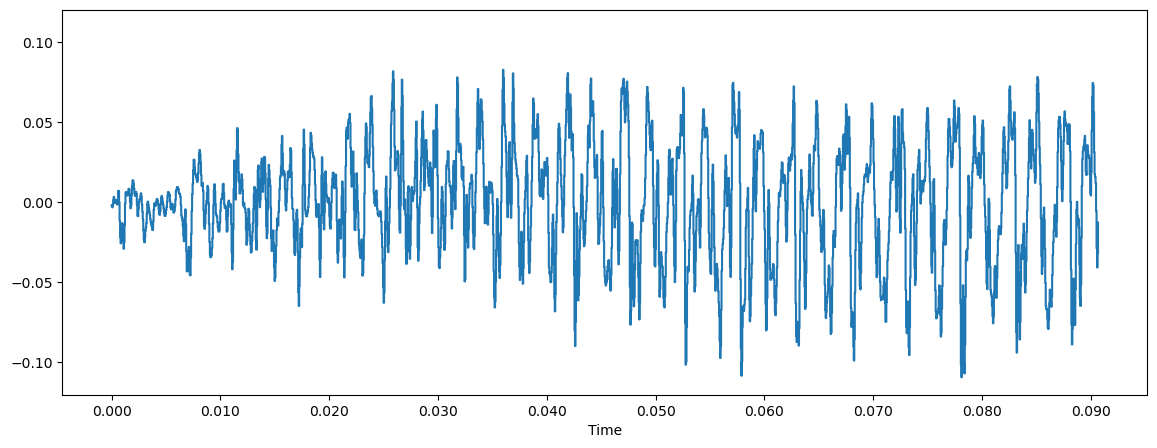

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x[:2000], sr=sr)

In [5]:
X = librosa.stft(x)
X_db = librosa.amplitude_to_db(abs(X))

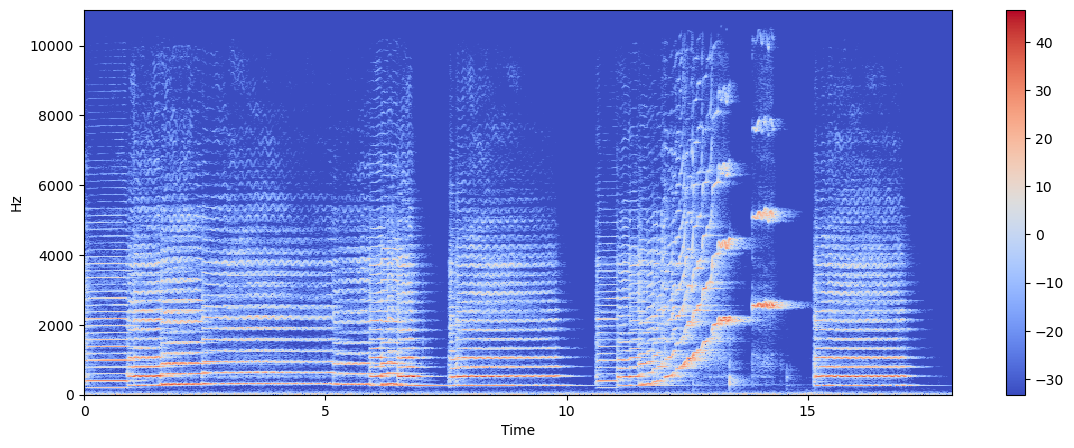

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

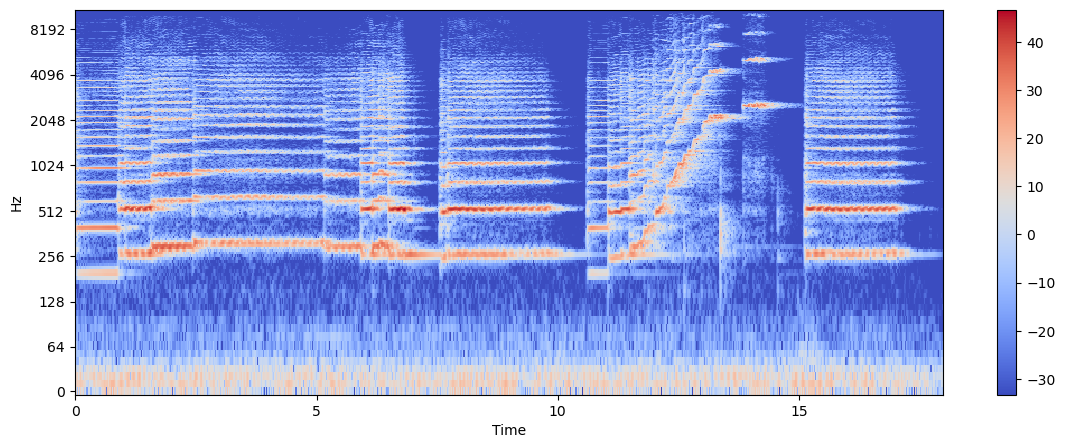

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar()

In [8]:
audio_path_E = "../data/raw/sound/mi.wav"
x_E, sr_E = librosa.load(audio_path_E)
X_E = librosa.stft(x_E)
X_E_db = librosa.amplitude_to_db(abs(X_E))

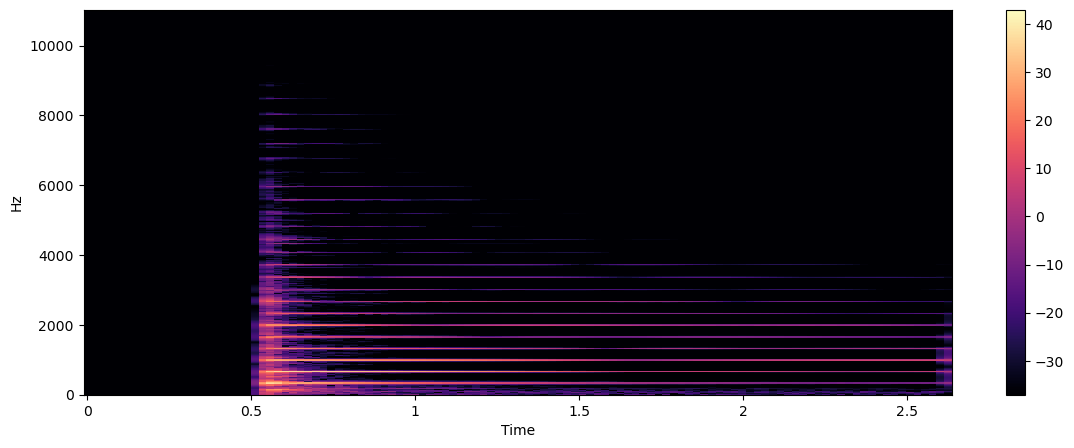

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_E_db, sr=sr_E, x_axis="time", y_axis="hz")
plt.colorbar()

In [10]:
audio_path_A = "../data/raw/sound/la.wav"
x_A, sr_A = librosa.load(audio_path_A)
X_A = librosa.stft(x_A)
X_A_db = librosa.amplitude_to_db(abs(X_A))

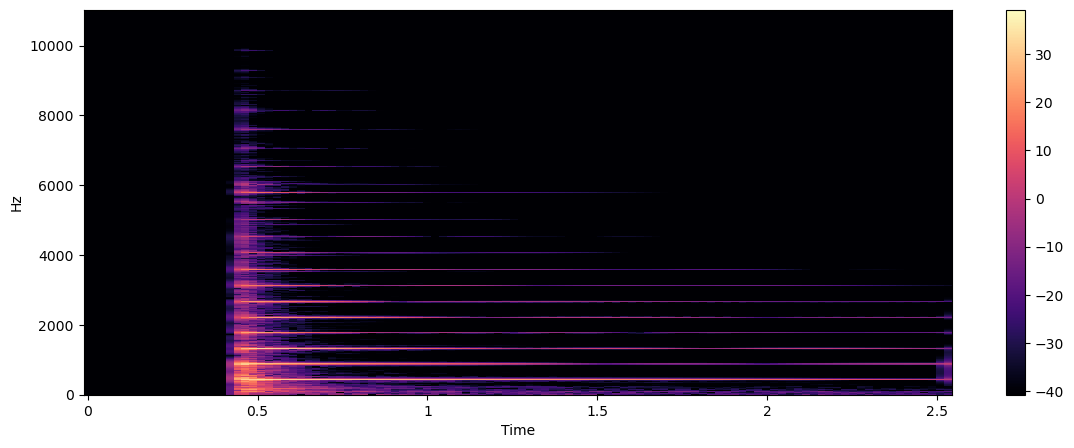

In [11]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_A_db, sr=sr_A, x_axis="time", y_axis="hz")
plt.colorbar()

In [12]:
audio_path_notes = "../data/raw/sound/do_re_mi_fa_so_la_si.wav"
x_notes, sr_notes = librosa.load(audio_path_notes)
X_notes = librosa.stft(x_notes)
X_notes_db = librosa.amplitude_to_db(abs(X_notes))

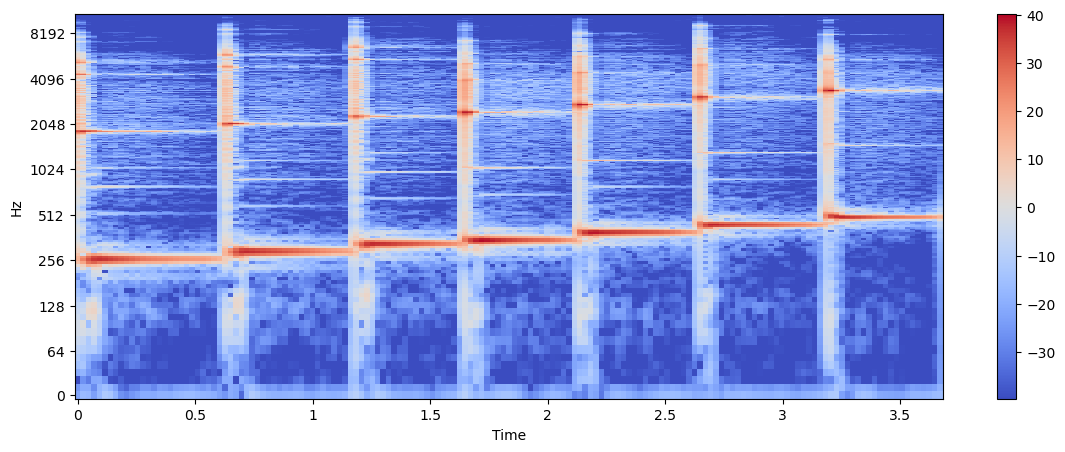

In [13]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_notes_db, sr=sr_notes, x_axis="time", y_axis="log")
plt.colorbar()

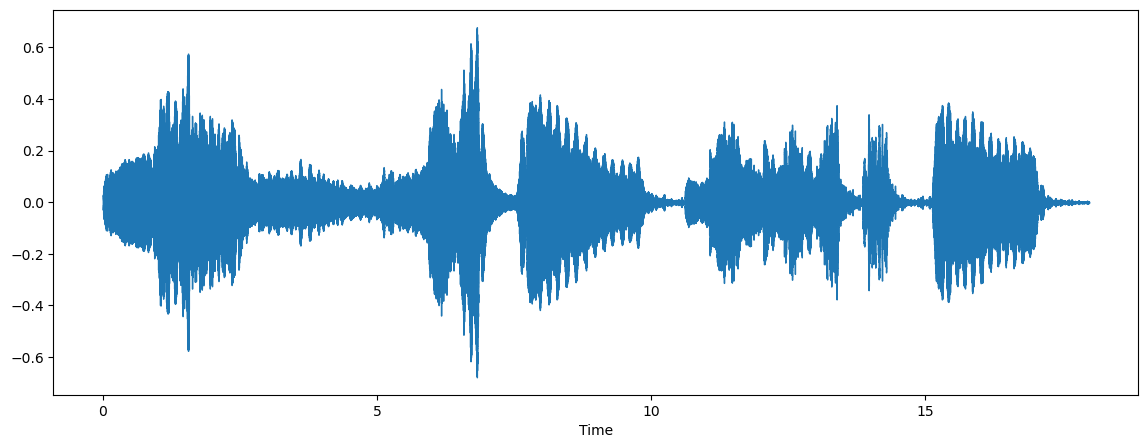

In [14]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

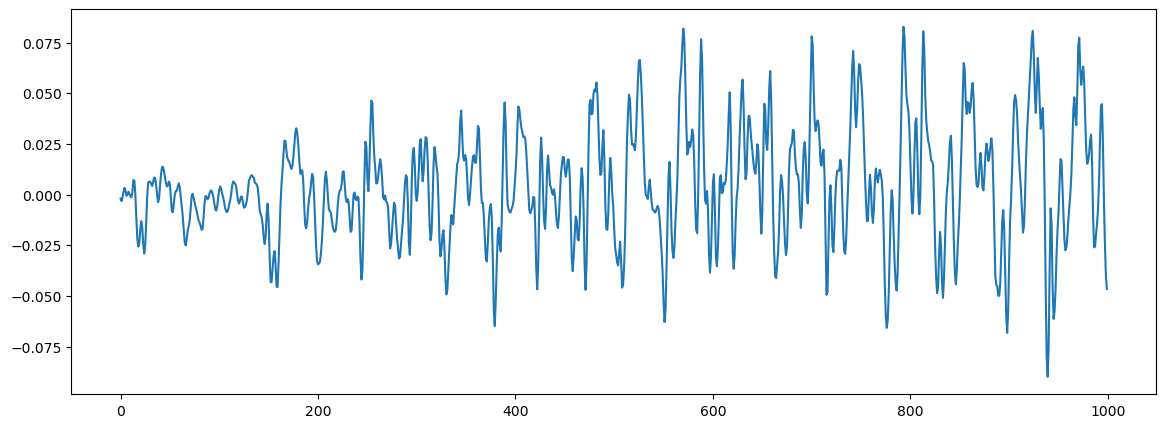

In [15]:
plt.figure(figsize=(14, 5))
plt.plot(x[:1000])
plt.grid(which="minor", color="gray", linestyle=":")
plt.show()

In [16]:
zero_crossing = librosa.zero_crossings(x[:1000], pad=False)

In [17]:
print(sum(zero_crossing))
print(type(zero_crossing))
print(zero_crossing)

124
<class 'numpy.ndarray'>
[False False False  True False False  True False  True False  True False
  True False False  True False False False False False False False False
 False False False False  True False False False False False False False
 False False  True False  True False False False False False False False
 False False False  True False False False  True False False False False
 False  True False False False False False False False False False False
 False  True  True False False False False False False False False False
 False False False False False False  True False False False  True False
 False False False False  True False False False  True False False False
 False False False False  True False False False False False False  True
 False False False False False False False False False  True False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False Fals

In [18]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
print(spectral_centroids.shape)

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

(775,)


In [19]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

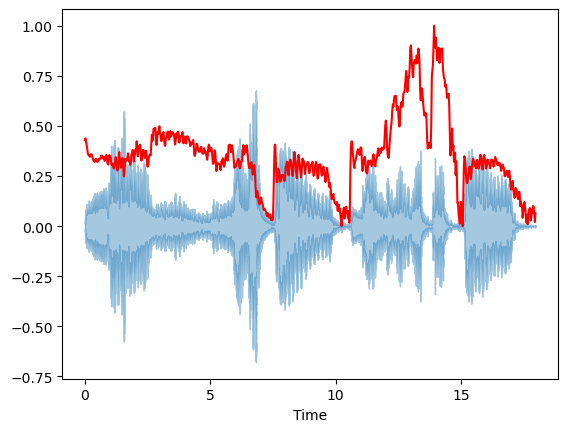

In [20]:
librosa.display.waveshow(x, sr=sr, alpha=.4)
plt.plot(t, normalize(spectral_centroids), color="r")

In [21]:
spectral_rolloffs = librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
print(spectral_rolloffs.shape)

frames = range(len(spectral_rolloffs))
t = librosa.frames_to_time(frames)

(775,)


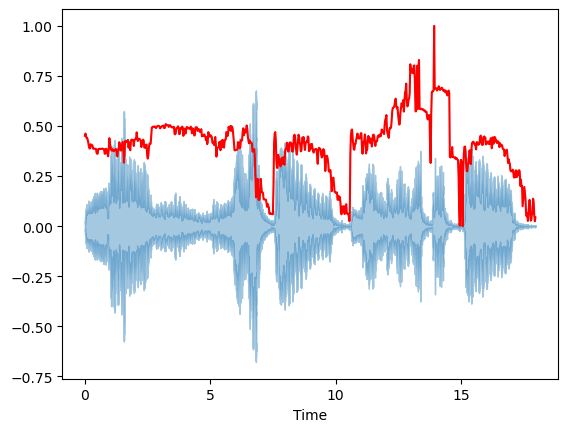

In [22]:
librosa.display.waveshow(x, sr=sr, alpha=.4)
plt.plot(t, normalize(spectral_rolloffs), color="r")

In [23]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

(20, 775)


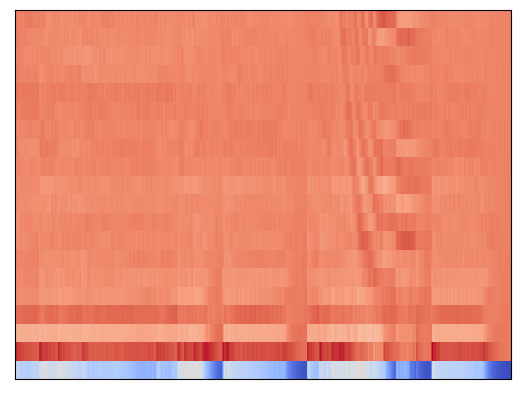

In [24]:
librosa.display.specshow(mfccs, sr=sr)

(20, 775)


/home/green-machine/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/green-machine/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


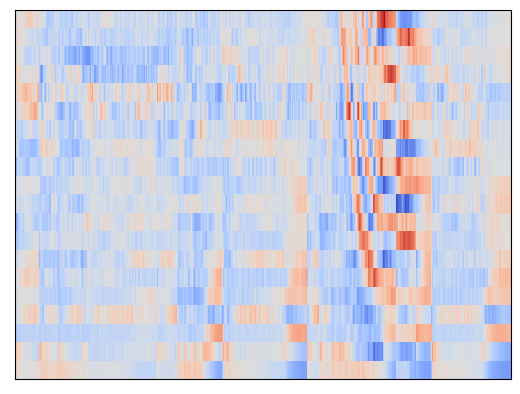

In [25]:
mfccs = scale(librosa.feature.mfcc(y=x, sr=sr), axis=1)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr)

/tmp/ipykernel_18352/3820471183.py:3: FutureWarning: Pass y=[-0.00200334 -0.00321401 -0.00137845 ...  0.00087895  0.00088357
  0.00095716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromogram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


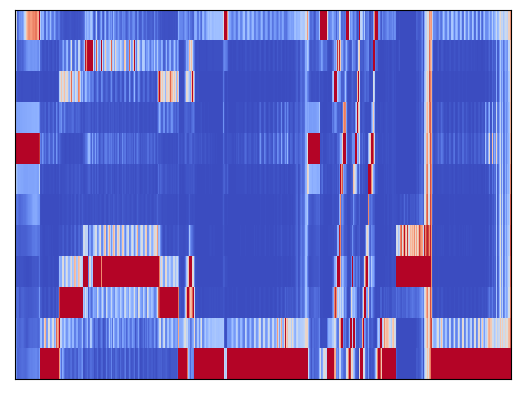

In [27]:
hop_length = 512

chromogram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
librosa.display.specshow(chromogram, sr=sr, cmap="coolwarm")